In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import scipy
import csv
import pandas as pd
df = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\05_CompiledMonthly\CSV\2022_Feb.csv")
df.dropna(inplace=True) # Drop null values
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
df.set_index('id', inplace=True)
df.head()

,spacetype,spacetype_1,area,vol,level,h,orien,nef,aef,lef,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
301_BS_O_O01,Offices,Shared Cellular Offices,24.00,90.00,-1,3.75,5,1,22.50,0.00759,...,0.2500,0.9375,18.59,11.39,0.00545,0.707,13.625,0.665,63.63000,2.828000
301_BS_O_O02,Offices,Shared Cellular Offices,12.00,45.00,-1,3.75,5,1,11.25,0.00380,...,0.2500,0.9375,18.73,11.52,0.00543,0.648,13.621,0.665,29.16000,2.592000
301_BS_O_O03,Offices,Shared Cellular Offices,10.00,37.50,-1,3.75,5,1,9.37,0.00316,...,0.2499,0.9370,18.14,10.93,0.00531,0.610,14.062,0.686,22.87500,2.441302
301_BS_O_O04,Offices,Shared Cellular Offices,16.50,61.88,-1,3.75,5,1,11.25,0.00380,...,0.1818,0.6818,18.34,11.13,0.00533,0.441,13.800,0.673,27.28908,2.425696
301_BS_O_O05,Offices,Shared Cellular Offices,24.75,92.81,-1,3.75,320,2,20.63,0.00696,...,0.2223,0.8336,18.16,10.95,0.00532,0.787,13.918,0.679,73.04147,3.540546


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [3]:
X = df[['orien', 'nef', 'aef', 'aefa', 'lpw', 'q4','ach', 'hum']]
y = pd.Series(df.pm25)
X.head()

,orien,nef,aef,aefa,lpw,q4,ach,hum
id,,,,,,,,
301_BS_O_O01,5,1,22.50,0.9375,0.02775,2.828000,0.707,0.00545
301_BS_O_O02,5,1,11.25,0.9375,0.02063,2.592000,0.648,0.00543
301_BS_O_O03,5,1,9.37,0.9370,0.01969,2.441302,0.610,0.00531
301_BS_O_O04,5,1,11.25,0.6818,0.02625,2.425696,0.441,0.00533
301_BS_O_O05,320,2,20.63,0.8336,0.02719,3.540546,0.787,0.00532


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# RANDOM FOREST

In [5]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [6]:
RF = RandomForestRegressor(n_estimators=10, max_depth = 2, min_samples_leaf =1, min_samples_split=2, random_state =42)
from pprint import pprint

In [7]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [8]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestRegressor(n_estimators=10, max_depth = 2, min_samples_leaf =1, min_samples_split=2, random_state =42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=2, n_estimators=10,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [10]:
RF_random.best_params_


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

Evaluate Random Search
To determine if random search yielded a better model, we compare the base model with the best random search model.

In [11]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=10, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

RMSE values:  [1.16 1.39 1.76 1.35 1.4  1.27 1.5  1.29 2.14 2.06]
RMSE average:  1.5329125296559891


In [12]:
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [13]:
def evaluate(RF, X_test, y_test):
    predictions = RF.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    rmse = float(format(np.sqrt(mean_squared_error(y_test, predictions)), '.3f'))    
    accuracy = 100 - mape
    print('Model Performance:')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print("\nRMSE: ", rmse)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators=10, max_depth = 2, min_samples_leaf =1, min_samples_split=2, random_state =42)
RF_pre=base_model.fit(X_test, y_test)
base_accuracy = evaluate(RF_pre, X_test, y_test)

Model Performance:
Average Error: 0.8658 degrees.

RMSE:  1.14
Accuracy = 89.03%.


In [14]:
y_pred = RF_pre.predict(X_test)
predictions = pd.DataFrame(y_pred)

In [15]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.14


In [16]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred))

R2 Value: 0.8816897442289342


In [17]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.87 degrees.


In [18]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 89.02782968237207


In [20]:
predictions.to_csv(r'C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\01_RF\02_PredictedData_pre.csv')

In [24]:
results = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\01_RF\03_Results_pre.csv")
results.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,5.233,5.118230
2,5.903,5.559459
3,9.920,8.412732
4,4.721,5.118230
5,9.685,9.029534
...,...,...
86,7.890,8.235064
87,3.732,5.118230
88,12.177,11.931997


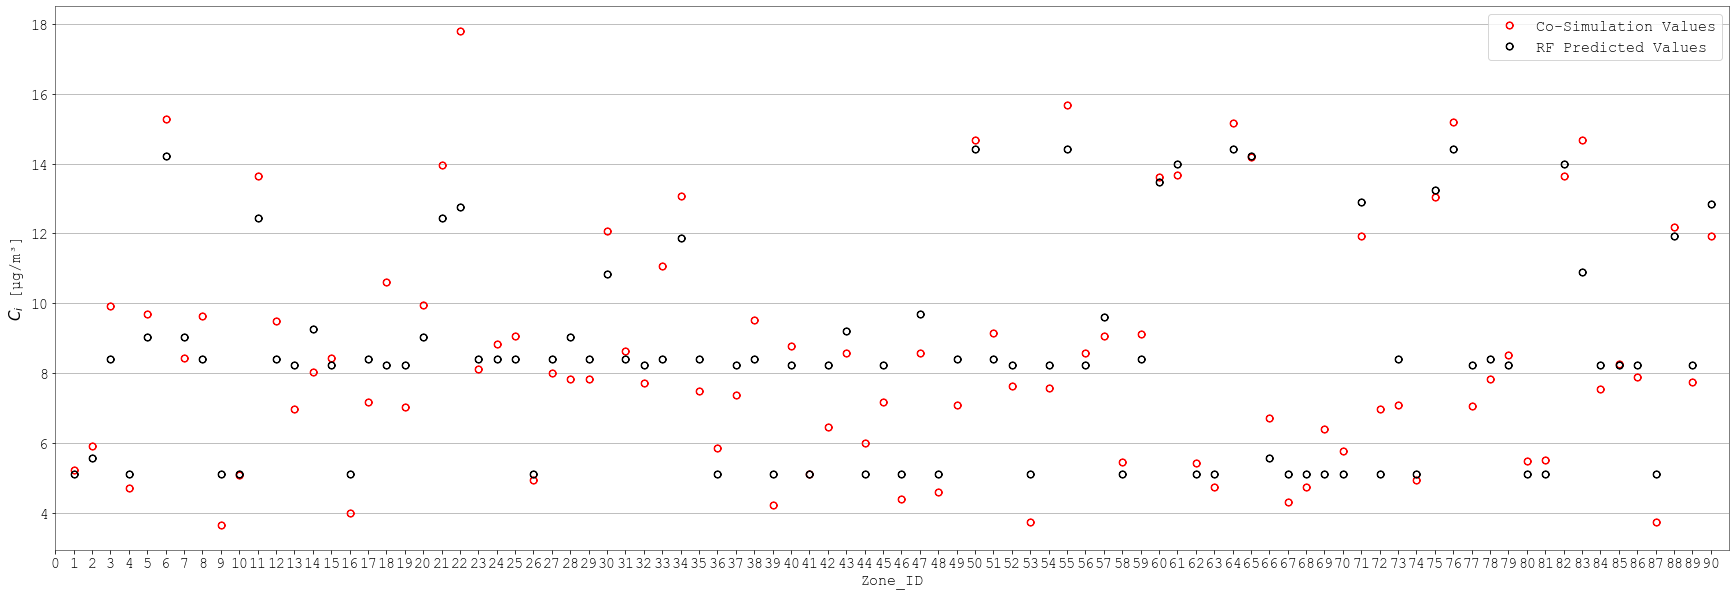

In [22]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(1,91,1)
plt.xticks(results['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('Co-Simulation Values','RF Predicted Values'))
plt.grid(axis='y')

plt.savefig('Feb_RF_2022_60p_pre', dpi=150)
plt.show()

(0.9422907583846336, 1.3623723226341777e-43)

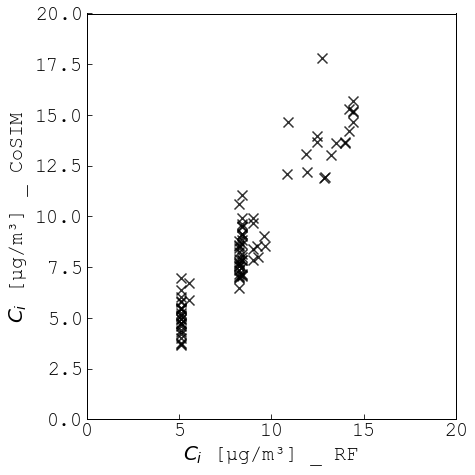

In [25]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ RF ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Feb_RF_2022_Pears_60p_pre', dpi=150)
from scipy import stats
stats.pearsonr(results['True_Values'], results['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


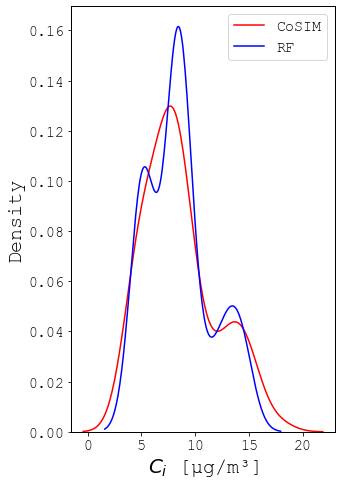

In [26]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results['Predicted_Values'], hist=False, color="b", label="January Indoor PM2.5 [\u03BCg/m\u00b3] (RF)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','RF'))
plt.savefig('Feb_RF_2022_Density_60p_pre', dpi=150)
plt.show()
plt.close()

In [27]:
RF_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [28]:
best_random = RF_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance:
Average Error: 0.7149 degrees.

RMSE:  1.043
Accuracy = 90.79%.


In [29]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.98%.


In [33]:
# Initializing the Random Forest Regression model with 500 decision trees
model = RandomForestRegressor(n_estimators= 800,min_samples_split=2, min_samples_leaf= 1,max_features = 'sqrt', max_depth= 70,bootstrap = False, random_state=42)
# Fitting the Random Forest Regression model to the data
RF_tune=model.fit(X_train, y_train)

In [34]:
# Predicting the target values of the test set
y_pred_tune = RF_tune.predict(X_test)
predictions_tune = pd.DataFrame(y_pred_tune)

In [35]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_tune)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.043


In [36]:
# Calculate the absolute errors
errors = abs(y_pred_tune - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.71 degrees.


In [37]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred_tune))

R2 Value: 0.9010773294389733


In [38]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred_tune) / y_test)) * 100))

Accuracy 90.79055719021747


In [40]:
predictions_tune.to_csv(r'C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\01_RF\02_PredictedData_tune.csv')

In [43]:
results_tuned = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220623_PredictiveModels\02_Feb_01\01_RF\03_Results_tuned.csv")
results_tuned.set_index('Zone_ID')

,True_Values,Predicted_Values
Zone_ID,,
1,5.233,6.409582
2,5.903,6.568436
3,9.920,9.828099
4,4.721,4.038798
5,9.685,8.878686
...,...,...
86,7.890,8.358236
87,3.732,4.283406
88,12.177,10.798516


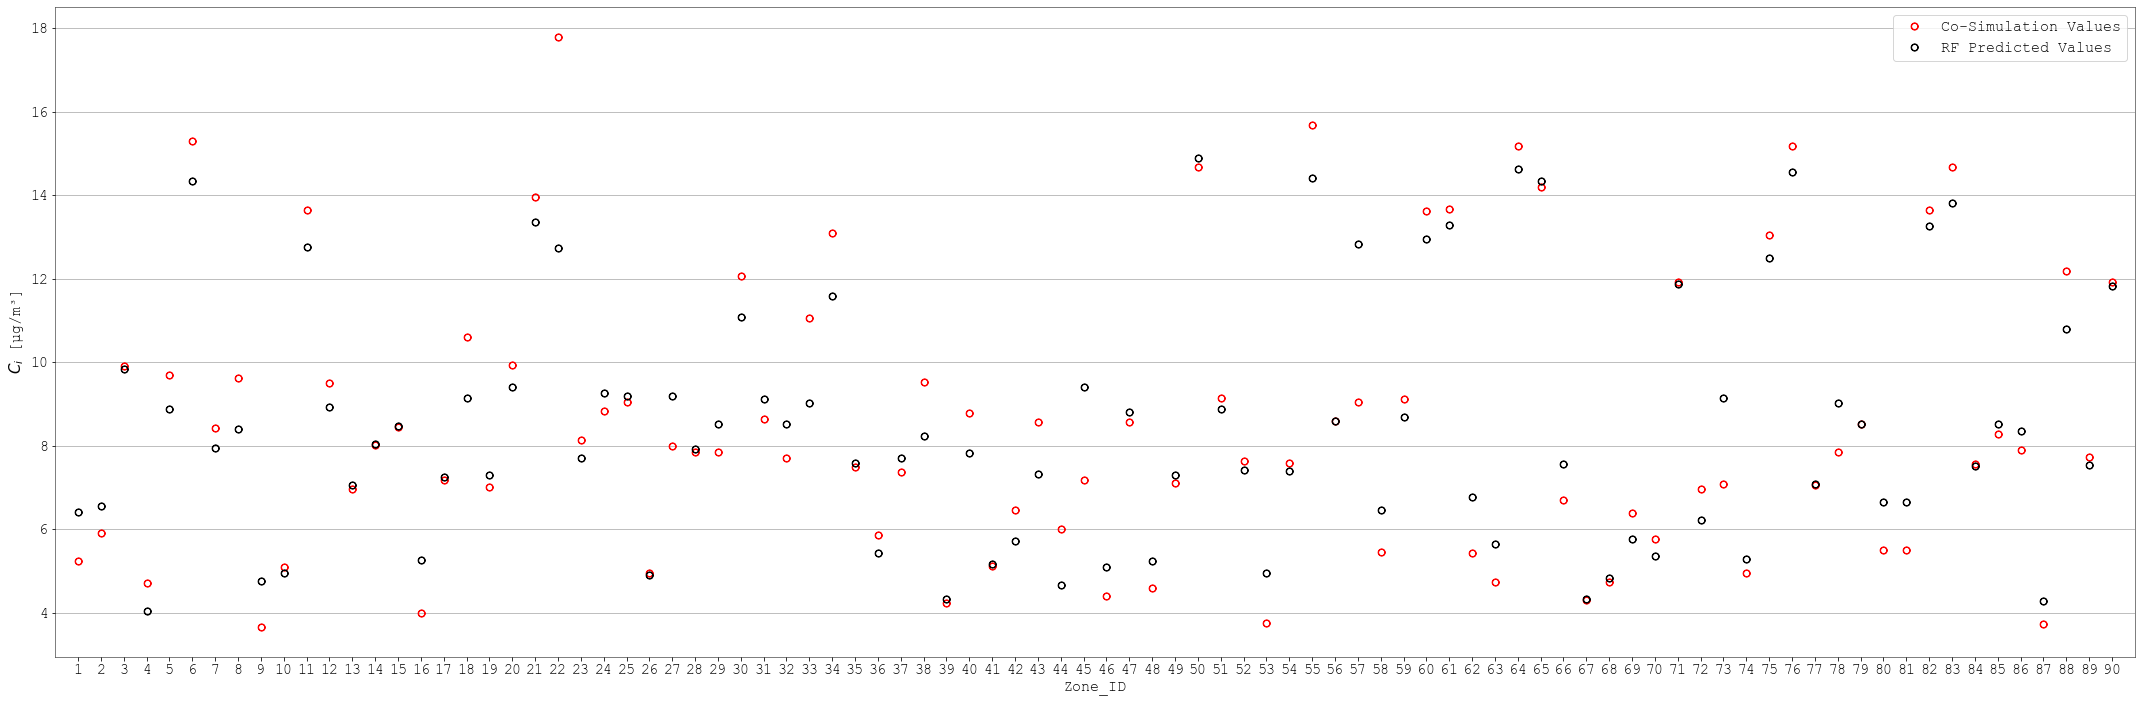

In [42]:
plt.rcParams.update({'font.family':'Courier New'})
plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams['figure.figsize'] = (30, 10)
plt.xlabel('Zone_ID')
plt.rcParams["figure.autolayout"] = True
plt.xlim(0,91,1)
plt.xticks(results['Zone_ID'])
plt.ylabel('$C_i$ [\u03BCg/m\u00b3]')
plt.plot(results_tuned['True_Values'], c='r', marker='$\u25EF$', linewidth=0, markersize=7.5)
plt.plot(results_tuned['Predicted_Values'], c='k', marker="$\u25EF$", linewidth=0,  markersize=7.5)
plt.gca().legend(('Co-Simulation Values','RF Predicted Values'))
plt.grid(axis='y')

plt.savefig('RF_RF_2022_60p_tuned_model', dpi=150)
plt.show()

(0.9527706307697988, 2.529160587238885e-47)

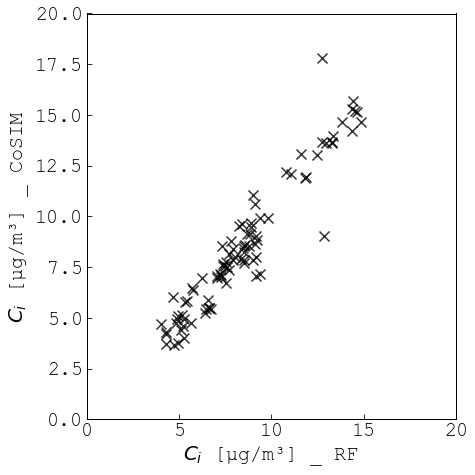

In [44]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 1
plt.tick_params( direction="in", length=5)
plt.scatter(x ='Predicted_Values', y ='True_Values', data = results_tuned, marker="x", color='k', s=100, alpha=0.8)
plt.ylabel('$C_i$ [\u03BCg/m\u00b3] _ CoSIM ', fontname="Courier New")
plt.xlabel('$C_i$ [\u03BCg/m\u00b3] _ RF ', fontname="Courier New")
plt.xlim(0,20,1)
plt.ylim(0,20,1)
plt.savefig('Feb_RF_2022_Pears_60p_tuned_model', dpi=150)
from scipy import stats
stats.pearsonr(results_tuned['True_Values'], results_tuned['Predicted_Values']) 

C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arp17tka\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


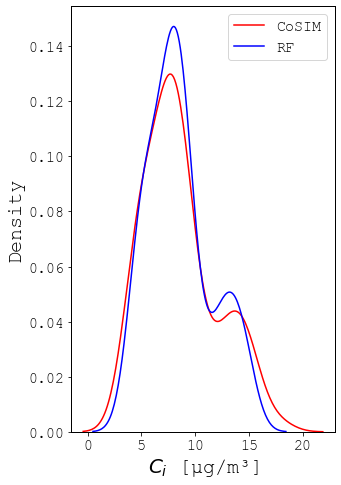

In [45]:
import seaborn as sns
plt.figure(figsize=(5, 7))
plt.rcParams.update({'font.size': 15})

ax = sns.distplot(results_tuned['True_Values'], hist=False, color="r", label="CoSIM")
sns.distplot(results_tuned['Predicted_Values'], hist=False, color="b", label="January Indoor PM2.5 [\u03BCg/m\u00b3] (RF)" , ax=ax)
plt.ylabel('Density',  fontsize = 20)
plt.xlabel('$C_i$ [\u03BCg/m\u00b3]', fontsize = 20)

plt.gca().legend(('CoSIM','RF'))
plt.savefig('Feb_RF_2022_Density_60p_tuned_model', dpi=150)
plt.show()
plt.close()

In [20]:
#Saving feature names for later use
feature_list = list(X.columns)

In [67]:
pip install pydot

You should consider upgrading via the 'C:\Users\Tha'er K Abdalla\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


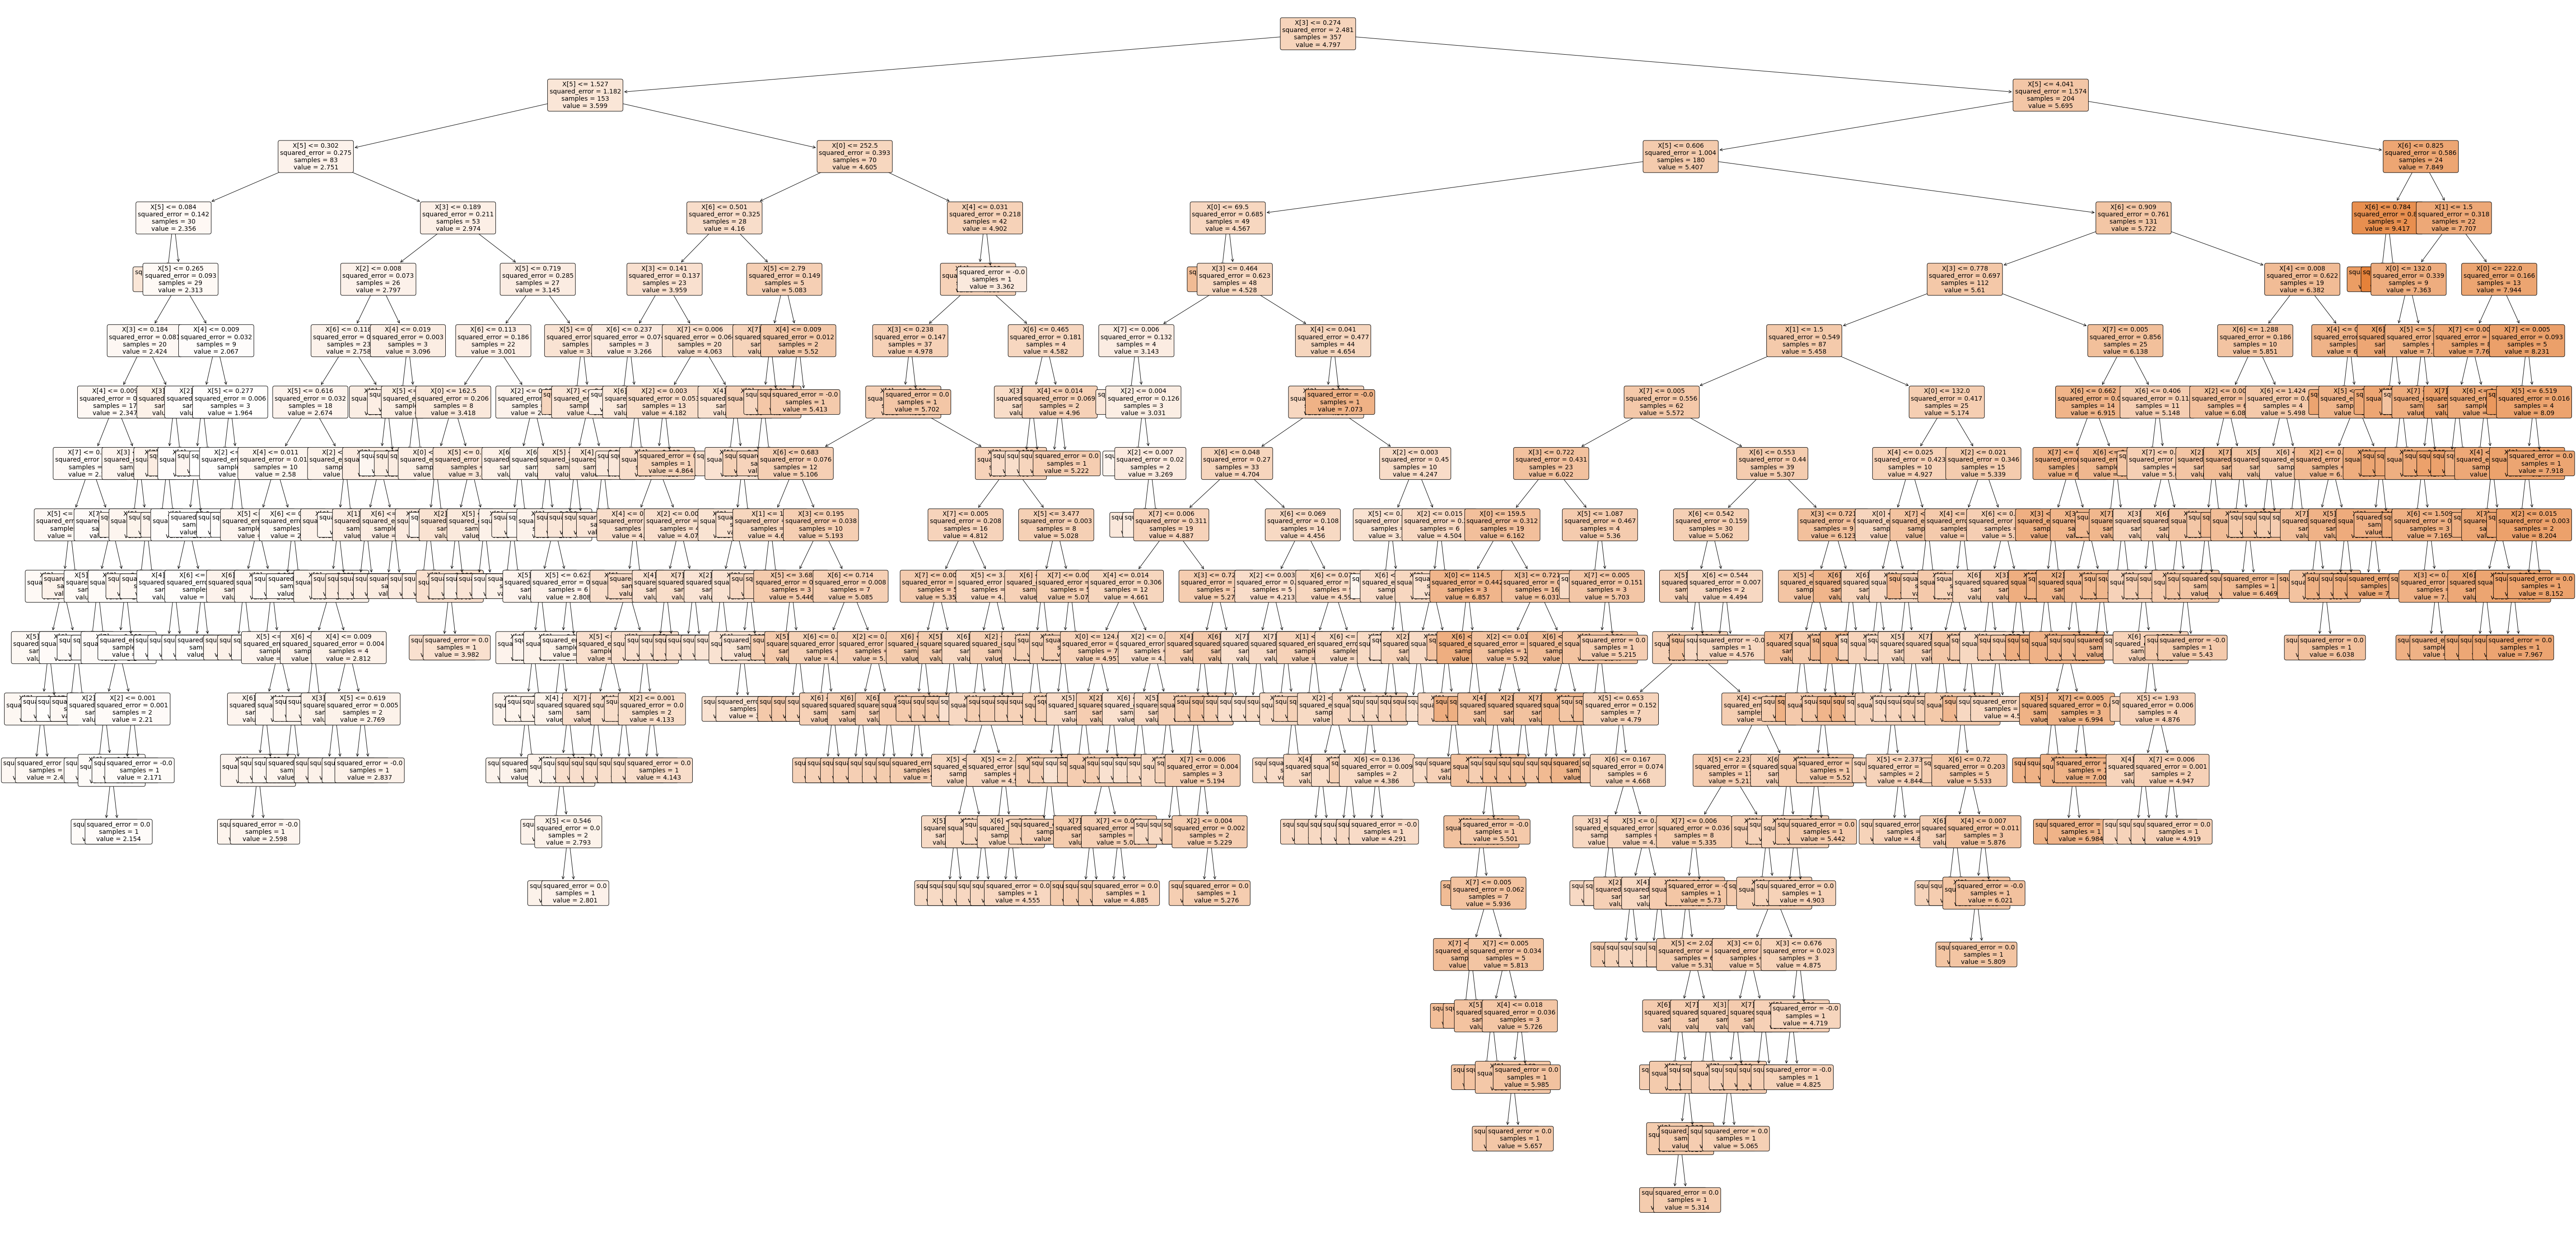

In [71]:

import pydot
# Pull out one tree from the forest
Tree = best_random.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [21]:
import shap
X100 = shap.utils.sample(X_test, 100) # 100 instances for use as the background distribution
#explain the RF model with SHAP
explainer_RF = shap.Explainer(RF.predict, X100)
shap_values_RF = explainer_RF(X_test)

Exact explainer: 91it [00:50,  1.53it/s]                                                                               


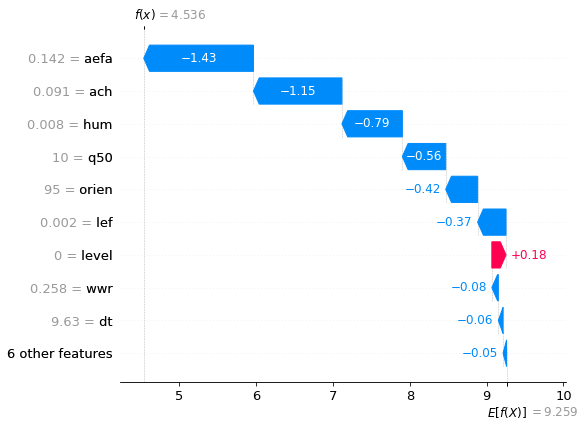

In [22]:
sample_ind =18
shap.plots.waterfall(shap_values_XGB[sample_ind], max_display=10)

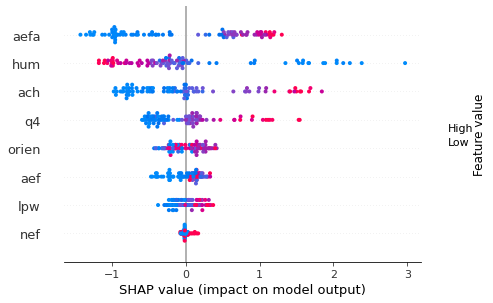

In [22]:
shap.plots.beeswarm(shap_values_RF, max_display=15)

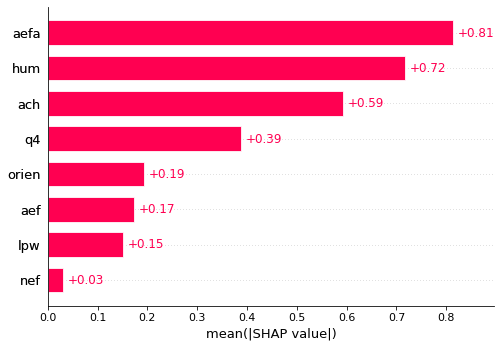

In [23]:
shap.plots.bar(shap_values_RF)

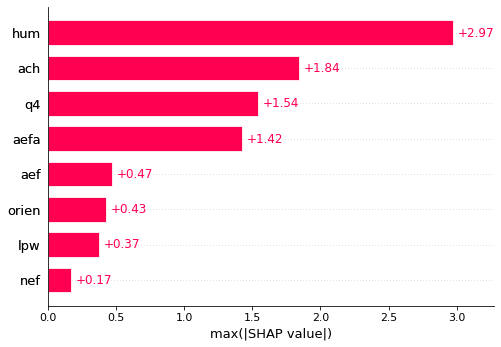

In [24]:
shap.plots.bar(shap_values_RF.abs.max(0))

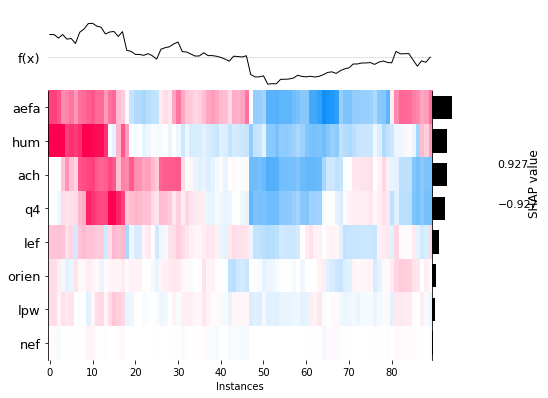

In [77]:
shap.plots.heatmap(shap_values_RF)

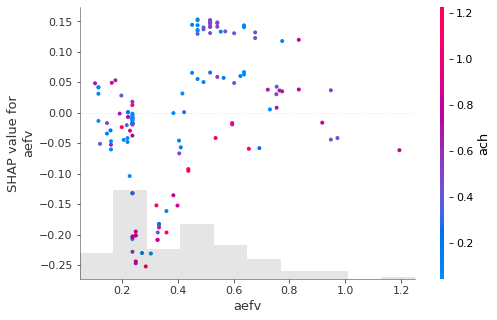

In [27]:
shap.plots.scatter(shap_values_XGB[:,"aefv"], color=shap_values_XGB[:,'ach'])

In [25]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
id,,
RC1_F2_O_O02,5.233,6.354230
RC2_F1_O_O12,5.903,6.527062
AT_F14_O_O08,9.920,9.823850
RC2_F1_O_O23,4.721,4.044133
AT_F10_O_O04,9.685,8.869862
...,...,...
RC2_F3_O_O04,7.890,8.383992
RC2_F1_O_O18,3.732,4.278735
AT_F1_O_O04,12.177,10.779767


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7143970555555552
Mean Squared Error: 1.0831505218956963
Root Mean Squared Error: 1.0407451762538686


In [27]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')


Mean Absolute Error: 0.71 degrees.
Accuracy: 90.795 %.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


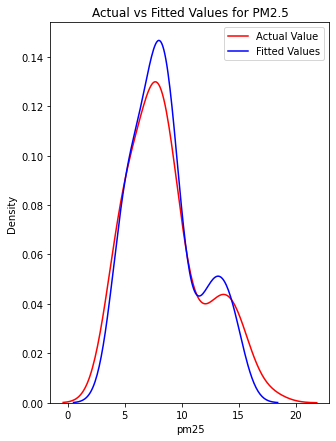

In [28]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')

plt.legend()
plt.show()
plt.close()

(0.9529140307980081, 2.219259370120932e-47)

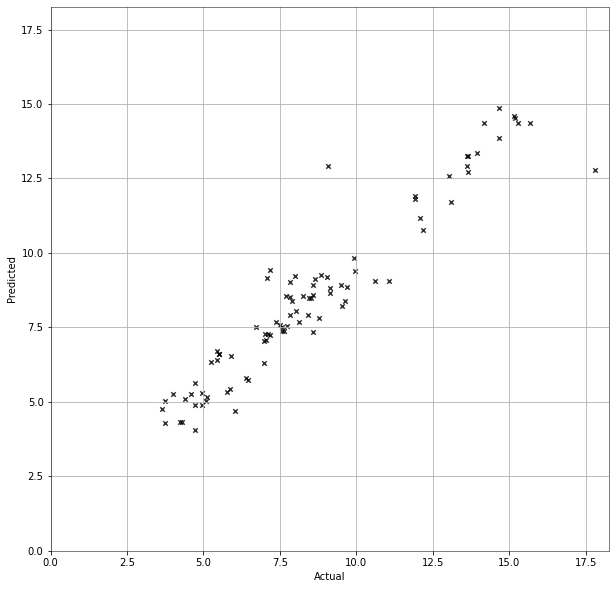

In [29]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = df, marker='x', color='k', s=20, alpha=0.8)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.xlim(0,18.25)
plt.ylim(0,18.25)
from scipy import stats
stats.pearsonr(df['Actual'], df['Predicted'])

In [25]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\arp17tka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [30]:
from yellowbrick.regressor import ResidualsPlot

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


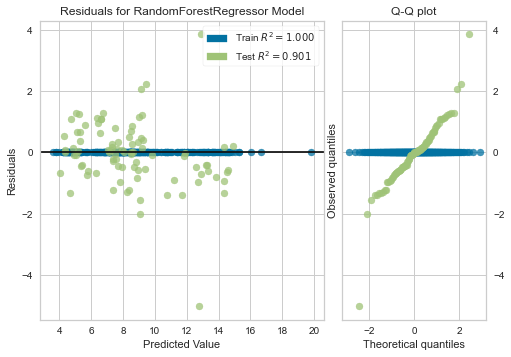

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer = ResidualsPlot(RF, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


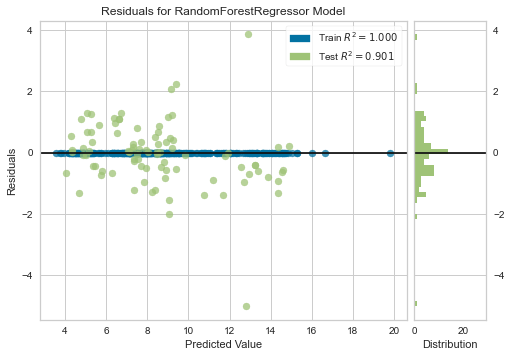

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
visualizer = ResidualsPlot(RF) 
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

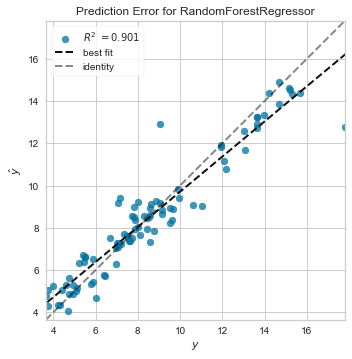

In [33]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(RF) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<AxesSubplot:title={'center':'Feature Importances of 8 Features using RandomForestRegressor'}, xlabel='feature importance'>

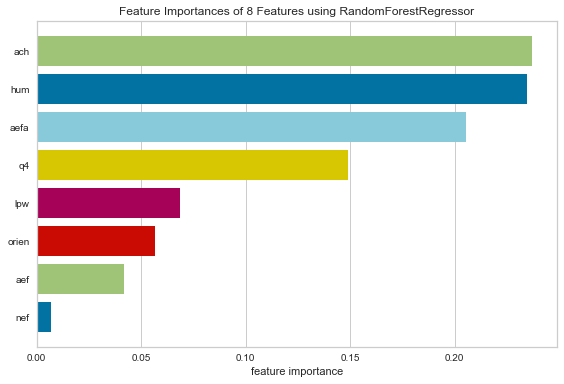

In [34]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(best_random,relative=False)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg")

In [36]:
ic = pd.read_csv(r"C:\users\arp17tka\My Drive\00_PhD TUoS\02_Third_Year_2020-2021\01_PredictiveModels\20220621_All_Data\04_ICoSS\CSV\2022_IC_Feb.csv")
ic.dropna(inplace=True) # Drop null values
ic.columns = ic.columns.map(lambda row: "_".join(row.lower().split(" "))) # Replace space with "_"
ic.set_index('id', inplace=True)
ic.head()

,zonetype,area,vol,level,h,orien,nef,aef,lef,naz,...,aefv,aefa,tin,dt,hum,ach,pm25,io,f,q4
id,,,,,,,,,,,,,,,,,,,,,
IC_F0_O_M01,Meeting Room,88.25,317.7,0,3.6,320,2,113.4,0.02421,3,...,0.35694,1.28499,18.067984,10.859670,0.007787,1.012978,12.652284,0.617486,321.823240,2.837947
IC_F0_O_O01,Shared Cellular Office,21.00,75.6,0,3.6,95,1,25.2,0.00538,3,...,0.33333,1.20000,18.470219,11.261905,0.005941,0.340806,12.284658,0.599544,25.764964,1.022419
IC_F1_EF_LB01,Lab,117.00,421.2,1,3.6,50,2,133.2,0.02844,4,...,0.31624,1.13846,16.566711,9.358396,0.005856,0.813475,11.878409,0.579717,342.635759,2.572341
IC_F1_EF_SR01,Seminar Room,84.00,302.4,1,3.6,320,2,93.6,0.01998,1,...,0.30952,1.11429,14.548789,7.340474,0.005640,0.778989,12.346712,0.602573,235.566316,2.516734
IC_F1_O_M01,Meeting Room,36.00,129.6,1,3.6,320,2,50.4,0.01076,1,...,0.38889,1.40000,17.090515,9.882200,0.007090,1.482804,14.604499,0.712762,192.171388,3.812924


In [37]:
ic1 = ic[['orien', 'nef', 'aef', 'aefa', 'lpw', 'q4','ach', 'hum']]
target_ic1 = pd.Series(ic.pm25)
ic1.head()

,orien,nef,aef,aefa,lpw,q4,ach,hum
id,,,,,,,,
IC_F0_O_M01,320,2,113.4,1.28499,0.00730,2.837947,1.012978,0.007787
IC_F0_O_O01,95,1,25.2,1.20000,0.00999,1.022419,0.340806,0.005941
IC_F1_EF_LB01,50,2,133.2,1.13846,0.00999,2.572341,0.813475,0.005856
IC_F1_EF_SR01,320,2,93.6,1.11429,0.00922,2.516734,0.778989,0.005640
IC_F1_O_M01,320,2,50.4,1.40000,0.00845,3.812924,1.482804,0.007090


In [38]:
ic2=RF.predict(ic1)

In [39]:
ic2 

array([11.17751  ,  8.803575 , 11.7969925, 12.3683   , 12.7578625,
       12.5114925,  8.0511575,  7.80318  ,  7.43651  , 10.492535 ,
       12.2414975,  7.91429  ,  7.7169   ,  7.25303  , 10.500225 ,
       11.4099   ,  7.989805 ,  7.963925 ,  7.448625 , 10.4162425])

In [40]:
comp=pd.DataFrame({'Actual':target_ic1, 'Predicted':ic2})
comp

,Actual,Predicted
id,,
IC_F0_O_M01,12.652284,11.177510
IC_F0_O_O01,12.284658,8.803575
IC_F1_EF_LB01,11.878409,11.796992
IC_F1_EF_SR01,12.346712,12.368300
IC_F1_O_M01,14.604499,12.757863
IC_F2_EF_LB01,11.237298,12.511493
IC_F2_EF_LB02,7.904933,8.051157
IC_F2_EF_LB03,6.949315,7.803180
IC_F2_EF_LB04,7.811048,7.436510


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


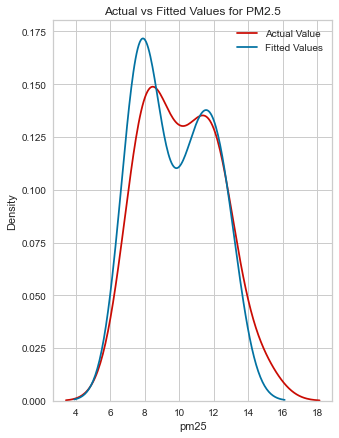

In [41]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(target_ic1, hist=False, color="r", label="Actual Value")
sns.distplot(ic2, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for PM2.5')
plt.legend()

plt.show()
plt.close()

In [42]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((target_ic1 - ic2) / target_ic1)) * 100))

Accuracy 90.50768619440812


In [43]:
# Calculate the absolute errors
errors = abs(ic2 - target_ic1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.0 degrees.


In [44]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_ic1, ic2)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.315


(0.8121104772392786, 1.3703149961929624e-05)

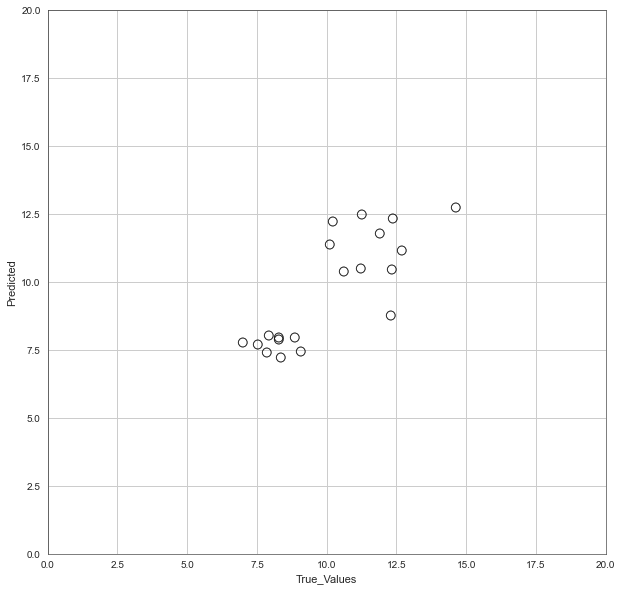

In [45]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5
plt.scatter(x ='Actual', y ='Predicted', data = comp, marker="$\u25EF$", color='k', s=100, alpha=1)
plt.ylabel('Predicted')
plt.xlabel('True_Values')
plt.xlim(0,20,0.5)
plt.ylim(0,20,0.5)
from scipy import stats
stats.pearsonr(comp['Actual'], comp['Predicted'])